(quick-tess)=

# Quick fits for TESS light curves

In [1]:
import exoplanet

#exoplanet.utils.docs_setup()
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")

exoplanet.__version__ = '0.5.0'


In [2]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

import exoplanet as xo

import pymc3 as pm
import aesara_theano_fallback.tensor as tt
import pymc3_ext as pmx 
from celerite2.theano import terms, GaussianProcess




In [3]:
import pandas as pd
df = pd.read_csv('./sample.csv')
df.head()

,Unnamed: 0,dr25_kepid,dr25_kepoi_name,dr25_kepler_name,dr25_ra,dr25_ra_err,dr25_ra_str,dr25_dec,dr25_dec_err,dr25_dec_str,...,b20_e_log10_iso_age,b18_KIC,b18_KOI,b18_Rp,b18_E_Rp,b18_e_Rp,b18_Fp,b18_E_Fp,b18_e_Fp,b18_Bin
0,6,10872983,K00756.03,Kepler-228 b,296.28613,0.0,19h45m08.67s,48.224670,0.0,+48d13m28.8s,...,0.333468,10872983.0,K00756.03,1.874,0.510,0.217,863.776,104.338,91.555,0.0
1,10,5436502,K00834.04,Kepler-238 b,287.89713,0.0,19h11m35.31s,40.637821,0.0,+40d38m16.2s,...,0.102239,5436502.0,K00834.04,1.905,0.407,0.204,2500.588,231.349,207.679,0.0
2,20,8150320,K00904.01,Kepler-55 d,285.16833,0.0,19h00m40.40s,44.026459,0.0,+44d01m35.3s,...,0.493659,8150320.0,K00904.01,1.939,0.209,0.181,195.005,11.083,10.496,0.0
3,28,5880320,K01060.02,Kepler-758 c,293.08463,0.0,19h32m20.31s,41.135441,0.0,+41d08m07.6s,...,0.099703,5880320.0,K01060.02,1.836,0.365,0.121,1211.822,83.344,77.105,0.0
4,30,5880320,K01060.04,Kepler-758 e,293.08463,0.0,19h32m20.31s,41.135441,0.0,+41d08m07.6s,...,0.099703,5880320.0,K01060.04,1.879,0.262,0.220,588.402,40.468,37.439,0.0


In [4]:
for col in df.columns:
    print(col)

Unnamed: 0
dr25_kepid
dr25_kepoi_name
dr25_kepler_name
dr25_ra
dr25_ra_err
dr25_ra_str
dr25_dec
dr25_dec_err
dr25_dec_str
dr25_koi_gmag
dr25_koi_gmag_err
dr25_koi_rmag
dr25_koi_rmag_err
dr25_koi_imag
dr25_koi_imag_err
dr25_koi_zmag
dr25_koi_zmag_err
dr25_koi_jmag
dr25_koi_jmag_err
dr25_koi_hmag
dr25_koi_hmag_err
dr25_koi_kmag
dr25_koi_kmag_err
dr25_koi_kepmag
dr25_koi_kepmag_err
dr25_koi_delivname
dr25_koi_vet_stat
dr25_koi_quarters
dr25_koi_disposition
dr25_koi_pdisposition
dr25_koi_count
dr25_koi_num_transits
dr25_koi_max_sngle_ev
dr25_koi_max_mult_ev
dr25_koi_bin_oedp_sig
dr25_koi_limbdark_mod
dr25_koi_ldm_coeff4
dr25_koi_ldm_coeff3
dr25_koi_ldm_coeff2
dr25_koi_ldm_coeff1
dr25_koi_trans_mod
dr25_koi_model_snr
dr25_koi_model_dof
dr25_koi_model_chisq
dr25_koi_time0bk
dr25_koi_time0bk_err1
dr25_koi_time0bk_err2
dr25_koi_eccen
dr25_koi_eccen_err1
dr25_koi_eccen_err2
dr25_koi_longp
dr25_koi_longp_err1
dr25_koi_longp_err2
dr25_koi_prad
dr25_koi_prad_err1
dr25_koi_prad_err2
dr25_koi_sma
dr

In [5]:
kep_id = df.dr25_kepid
unique_kepid = np.unique(df.dr25_kepid)
koi_name = np.array(df.dr25_kepoi_name)
koi_period = np.array(df.dr25_koi_period)
koi_depth = np.array(df.dr25_koi_depth)/10**3
koi_t0 = np.array(df.dr25_koi_time0bk)



for i in range (len(unique_kepid)):
    _kic = unique_kepid[i]
    arg = kep_id == unique_kepid[i]
    print(_kic,koi_name[arg],koi_period[arg],koi_depth[arg],koi_t0[arg])

1431122 ['K00994.01'] [4.2989201] [0.2376] [132.86187]
1432789 ['K00992.02'] [4.57834367] [0.1407] [132.2982]
1718189 ['K00993.01'] [21.85362905] [0.3556] [144.32031]
1865864 ['K04926.01'] [69.089357] [0.4751] [135.4461]
1872821 ['K02351.01'] [10.27380957] [0.3528] [134.65748]
2161536 ['K02130.01'] [16.85592593] [0.8715] [138.26808]
2307415 ['K02053.02'] [4.6126736] [0.1332] [132.7757]
2556650 ['K02156.01'] [2.85234826] [1.4029] [132.044534]
2558163 ['K04655.01'] [17.543847] [0.1963] [138.9151]
2577353 ['K07635.01'] [60.458443] [0.1752] [136.3553]
2693736 ['K01976.01'] [12.12401737] [0.7884] [134.955]
2713049 ['K00794.01'] [2.53918315] [0.3821] [169.67494]
2715135 ['K01024.01'] [5.74771191] [0.8201] [133.29939]
2832589 ['K01942.02'] [2.4337035] [0.2583] [133.83759]
2849805 ['K01116.01'] [3.74910575] [0.1826] [135.10837]
2854181 ['K02232.02'] [12.834857] [0.2939] [134.37229]
2854698 ['K00986.01'] [8.18739443] [0.5176] [260.86931]
3102384 ['K00273.01'] [10.57375145] [0.2989] [175.067739]

6853172 ['K06776.01'] [28.655498] [0.1736] [157.1618]
6862721 ['K01982.01'] [4.88753111] [0.6796] [132.70783]
6871071 ['K02220.02'] [5.02818253] [0.1813] [134.10891]
6921944 ['K02114.01'] [4.42156654] [0.684] [132.18465]
6948054 ['K00869.04'] [3.21981478] [0.4882] [133.00406]
6949061 ['K01960.01'] [8.96847034] [0.2343] [139.39473]
6949607 ['K00870.01' 'K00870.02'] [5.91227323 8.98581901] [0.9614 0.8813] [172.184012 175.68418 ]
7009548 ['K05341.01'] [15.18575582] [0.2567] [144.63985]
7017274 ['K03209.02'] [6.77067637] [0.0658] [133.34914]
7046035 ['K04424.01'] [2.27164952] [0.0824] [131.82601]
7047363 ['K02432.01'] [31.0572947] [0.6366] [147.56275]
7047824 ['K02806.01'] [24.7543849] [0.5933] [140.20732]
7109675 ['K00872.02'] [6.76652928] [0.4507] [138.0637]
7133294 ['K04473.01'] [13.6471211] [0.075] [132.2552]
7183745 ['K02521.02'] [4.86634094] [0.3667] [353.34131]
7217088 ['K06849.01'] [12.54474243] [0.2631] [139.58304]
7256914 ['K04136.02'] [4.03357434] [0.0662] [134.23275]
7265298 ['

10617017 ['K02149.01'] [13.15140223] [0.0978] [144.16237]
10656823 ['K00598.02'] [34.0963441] [0.4727] [153.82654]
10723367 ['K02236.02'] [12.12580644] [0.3275] [142.10763]
10744335 ['K01304.01'] [4.59726613] [0.313] [136.47837]
10788461 ['K03925.03'] [5.3235335] [0.3424] [133.0952]
10794087 ['K01316.01'] [7.64970832] [0.0554] [138.33113]
10854546 ['K02104.01'] [2.16845106] [0.4669] [132.14107]
10862759 ['K08035.01'] [29.4856392] [0.105] [151.8669]
10863608 ['K02368.01'] [8.07127043] [0.3182] [137.76604]
10872983 ['K00756.03'] [2.56658897] [0.2265] [179.55437]
10875245 ['K00117.02'] [4.90144976] [0.1407] [138.60548]
10879038 ['K01641.01'] [4.8538404] [0.1964] [135.09902]
10907132 ['K04503.01'] [5.89089509] [0.2677] [132.43645]
10908248 ['K03146.01'] [39.859505] [0.1555] [154.7616]
10925104 ['K00156.01'] [8.04134778] [0.591] [143.038292]
10928043 ['K01315.01'] [6.84639884] [0.1497] [133.76181]
10982872 ['K00343.02' 'K00343.03'] [ 2.02414357 41.8085031 ] [0.2394 0.1904] [170.496204 148.7

### Code above works

In [6]:
for i,_kic in enumerate(unique_kepid):
    print(i,_kic)

0 1431122
1 1432789
2 1718189
3 1865864
4 1872821
5 2161536
6 2307415
7 2556650
8 2558163
9 2577353
10 2693736
11 2713049
12 2715135
13 2832589
14 2849805
15 2854181
16 2854698
17 3102384
18 3103212
19 3122913
20 3217264
21 3218908
22 3231341
23 3234843
24 3244792
25 3245969
26 3338885
27 3340165
28 3348082
29 3440118
30 3446746
31 3553900
32 3561464
33 3632418
34 3645438
35 3661886
36 3728432
37 3745690
38 3758499
39 3765917
40 3847138
41 3848083
42 3854496
43 3867615
44 3967326
45 3967760
46 4172746
47 4242147
48 4249725
49 4262581
50 4274548
51 4275721
52 4454752
53 4458082
54 4466677
55 4633570
56 4636578
57 4644952
58 4645174
59 4650674
60 4676964
61 4741126
62 4757437
63 4762283
64 4770174
65 4770617
66 4831728
67 4847534
68 4852528
69 4857058
70 4914566
71 4918303
72 4932442
73 4939533
74 4947556
75 4989057
76 5007345
77 5022828
78 5027859
79 5031857
80 5036705
81 5088400
82 5088536
83 5091479
84 5095082
85 5126182
86 5197233
87 5202905
88 5209845
89 5219234
90 5289854
91 529494

In [7]:
#plt.scatter(df.dr25_koi_period, df.dr25_koi_duration)

In [8]:
def pipeline(kepid, period_guess, t0_guess, depth_guess, cadence = 'long', koi = ""):
    
    
    nplanets = len(period_guess)
    
    lcfs = lk.search_lightcurve(kepid,
                                author="Kepler",
                                cadence=cadence).download_all(flux_column="pdcsap_flux")
    lc = lcfs.stitch().remove_nans().remove_outliers(sigma=7)

    x = np.ascontiguousarray(lc.time.value, dtype=np.float64)
    y = np.ascontiguousarray(1e3 * (lc.flux - 1), dtype=np.float64)
    yerr = np.ascontiguousarray(1e3 * lc.flux_err, dtype=np.float64)

    texp = np.min(np.diff(x))
    
    fig,ax = plt.subplots(nrows= nplanets + 1, ncols = 1,figsize=(8,4*nplanets))
    

    ax[0].plot(x, y, "k", linewidth=0.5)
    ax[0].set_xlabel("time [days]")
    _ = ax[0].set_ylabel("relative flux [ppt]")
    ax[0].set_title(kepid)
    
    argsort_x = np.argsort(x)
    x = x[argsort_x]
    y = y[argsort_x]
    yerr = yerr[argsort_x]
    
    print(x)
    



    with pm.Model() as model:

        # Stellar parameters
        mean = pm.Normal("mean", mu=0.0, sigma=10.0) 
        u = xo.QuadLimbDark("u") #same, under Kipping 2013 comment
        star_params = [mean, u]

        # Gaussian process noise model
        sigma = pm.InverseGamma("sigma", alpha=3.0, beta=2 * np.median(yerr))
        log_sigma_gp = pm.Normal("log_sigma_gp", mu=0.0, sigma=10.0)
        log_rho_gp = pm.Normal("log_rho_gp", mu=np.log(10.0), sigma=10.0)
        kernel = terms.SHOTerm(
            sigma=tt.exp(log_sigma_gp), rho=tt.exp(log_rho_gp), Q=1.0 / 3
        )
        noise_params = [sigma, log_sigma_gp, log_rho_gp]

        # Planet parameters
        log_ror = pm.Normal(
            "log_ror", mu=0.5 * np.log(depth_guess * 1e-3), sigma=10.0, shape = nplanets
        ) #changed
        ror = pm.Deterministic("ror", tt.exp(log_ror))

        # Orbital parameters
        log_period = pm.Normal("log_period", mu=np.log(period_guess), sigma=1.0, shape = nplanets) #changed, eventually change into shape = n_planets 
        period = pm.Deterministic("period", tt.exp(log_period)) #same
        t0 = pm.Normal("t0", mu=t0_guess, sigma=1.0, shape = nplanets) #changed
        log_dur = pm.Normal("log_dur", mu=np.log(0.1), sigma=10.0, shape = nplanets)
        dur = pm.Deterministic("dur", tt.exp(log_dur))
        b = xo.distributions.ImpactParameter("b", ror=ror, shape = nplanets) #changed

        # Set up the orbit
        orbit = xo.orbits.KeplerianOrbit(period=period, ror = ror, duration=dur, t0=t0, b=b) #Same except this has duration

        # We're going to track the implied density for reasons that will become clear later
        pm.Deterministic("rho_circ", orbit.rho_star) #transit notebook uses light_curves

        # Set up the mean transit model
        star = xo.LimbDarkLightCurve(u)
        lc_model = mean + 1e3 * tt.sum(
            star.get_light_curve(orbit=orbit, r=ror, t=x, texp = texp), axis=-1)
            
        lc_models = mean + 1e3 * star.get_light_curve(orbit=orbit, r=ror, t=x, texp = texp)

        # Finally the GP observation model
        gp = GaussianProcess(kernel, t=x, diag=yerr ** 2 + sigma ** 2)
        gp.marginal("obs", observed=y - lc_model)

        # Double check that everything looks good - we shouldn't see any NaNs!
        print(model.check_test_point())

        # Optimize the model
        map_soln = model.test_point
        map_soln = pmx.optimize(map_soln, [sigma])
        map_soln = pmx.optimize(map_soln, [ror, b, dur])
        map_soln = pmx.optimize(map_soln, noise_params)
        map_soln = pmx.optimize(map_soln, star_params)
        map_soln = pmx.optimize(map_soln)
        
        
        with model:
        
    
            lc_pred = pmx.eval_in_model(lc_models, map_soln)
            lc_sum = pmx.eval_in_model(lc_model, map_soln)
            gp_pred = pmx.eval_in_model(gp.predict(y - lc_sum), map_soln)
            
            
            print(np.shape(lc_pred))

            
            for i in range(nplanets):
                
                x_fold = (x - map_soln["t0"][i] + 0.5 * map_soln["period"][i]) % map_soln["period"][i] - 0.5 * map_soln["period"][i]
                inds = np.argsort(x_fold)
                
                
                flattened_lc = y - gp_pred - map_soln["mean"]
                #other = map_soln #not sure why I put this here
                sc = ax[i+1].scatter(x_fold, y - gp_pred - map_soln["mean"], c=x, s=3, rasterized = True)
                ax[i+1].plot(x_fold[inds], lc_pred[inds,i] - map_soln["mean"], "k")
                ax[i+1].set_xlabel("time since transit [days]")
                ax[i+1].set_ylabel("relative flux [ppt]")
                fig.colorbar(sc,label="time [days]", ax = ax[i+1])
                _ = ax[i+1].set_xlim(-0.25, 0.25)
                ax[i+1].set_ylim(np.percentile(flattened_lc,0.5),np.percentile(flattened_lc,99.5))
                ax[i+1].set_title(koi[i])
                
                plt.tight_layout()
                
                
                plt.savefig("./Figures/" + kepid.replace(" ","") + ".png", dpi = 200)
                #plt.savefig("./Figures/" + koi.replace(" ","") + ".png", dpi = 200)
                
            map_soln_df = pd.DataFrame(map_soln)
            map_soln_df.to_csv("./outputs/" + kepid.replace(" ","") + '.csv')
                
        
        return map_soln
        
      

[ 131.5123273   131.532762    131.5531966  ... 1590.96030445 1590.98073894
 1591.00117363]


WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0


mean                   -3.22
u_quadlimbdark__       -2.77
sigma_log__            -0.53
log_sigma_gp           -3.22
log_rho_gp             -3.22
log_ror                -6.44
log_period             -1.84
t0                     -1.84
log_dur                -6.44
b_impact__             -2.77
obs                -61100.40
Name: Log-probability of test_point, dtype: float64


WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
optimizi

message: Optimization terminated successfully.
logp: -61132.70614986639 -> -61058.655599454076
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot co

message: Optimization terminated successfully.
logp: -61058.655599454076 -> -61030.59071035616
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: {self.__class__.__name__ }{{{self.len_splits}}}.1
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a sca

message: Optimization terminated successfully.
logp: -61030.59071035616 -> -52327.063100572544
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot co

message: Optimization terminated successfully.
logp: -52327.063100572544 -> -52326.94352368217
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: {self.__class__.__name__ }{{{self.len_splits}}}.1
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{mul}.0
WARNING (theano.tensor.opt): Cannot construct a sca

message: Desired error not necessarily achieved due to precision loss.
logp: -52326.94352368217 -> -52326.69179547777
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano

(51816, 2)


ValueError: too many values to unpack (expected 3)

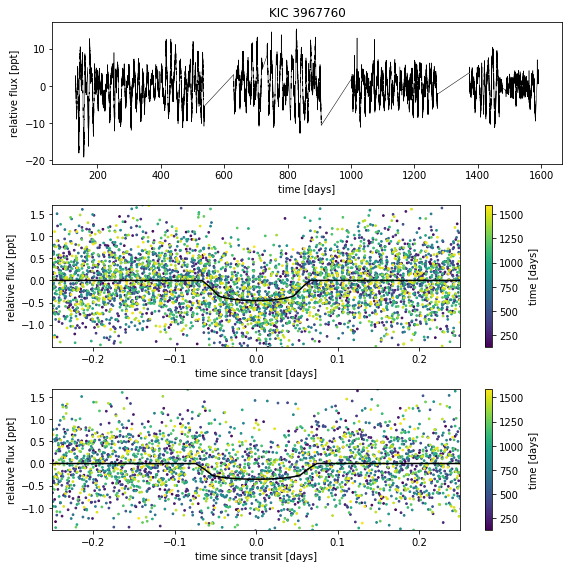

In [9]:
map_solution = pipeline(kepid = "KIC 3967760", period_guess = np.array([5.52418625,8.77514782]), t0_guess = np.array([135.62306,133.70319]), 
             depth_guess = np.array([0.491,0.3519]),cadence = 'long', koi = np.array(["", ""]))

In [ ]:
plt.plot(lc_pred[:800])
print(np.exp(map_solution["log_period"]))

In [ ]:
import pandas as pd
map_soln_df = pd.DataFrame(map_solution)
map_soln_df.head()
map_soln_df.to_csv('./map_solutions.csv')

In this tutorial, we will fit the TESS light curve for a known transiting planet.
While the {ref}`tess` case study goes through the full details of an end-to-end fit, this tutorial is significantly faster to run and it can give pretty excellent results depending on your goals.
Some of the main differences are:

1. We start from the light curve rather than doing the photometry ourselves. This should pretty much always be fine unless you have a very bright, faint, or crowded target.
2. We assume a circluar orbit, but as you'll see later, we can approximately relax this assumption later.
3. We only fit the data near transit. In many cases this will be just fine, but if you have predictable stellar variability (like coherent rotation) then you might do better fitting more data.

We'll fit the planet in the HD 118203 (TIC 286923464) system that was found to transit by [Pepper et al. (2019)](https://arxiv.org/abs/1911.05150) because it is on an eccentric orbit so assumption #2 above is not valid.

First, let's download the TESS light curve using [lightkurve](https://docs.lightkurve.org/):

In [ ]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt


cadence = "long"
lcfs = lk.search_lightcurve("KIC 11512246",
                            author="Kepler",
                            cadence=cadence).download_all(flux_column="pdcsap_flux")
lc = lcfs.stitch().remove_nans().remove_outliers(sigma=7)

x = np.ascontiguousarray(lc.time.value, dtype=np.float64)
y = np.ascontiguousarray(1e3 * (lc.flux - 1), dtype=np.float64)
yerr = np.ascontiguousarray(1e3 * lc.flux_err, dtype=np.float64)

texp = np.min(np.diff(x))

plt.plot(x, y, "k", linewidth=0.5)
plt.xlabel("time [days]")
_ = plt.ylabel("relative flux [ppt]")

Then, find the period, phase and depth of the transit using box least squares:stitch

In [ ]:
import exoplanet as xo

period_guess = 7.10695741,8.03439434
t0_guess = 138.32299999985844
depth_guess = 0.131

Then, for efficiency purposes, let's extract just the data within 0.25 days of the transits:

In [ ]:
#period_guess = 7.10695741,8.03439434
period_guess = np.array([7.10695741,8.03439434])
nplanets = len(period_guess)

for i in range(nplanets-1):
    print(period_guess)

In [ ]:
transit_mask = (
    np.abs(
        (x - t0_guess + 0.5 * period_guess) % period_guess - 0.5 * period_guess
    )
    < 0.25
)
x = np.ascontiguousarray(x[transit_mask])
y = np.ascontiguousarray(y[transit_mask])
yerr = np.ascontiguousarray(yerr[transit_mask])

plt.figure(figsize=(8, 4))
x_fold = (
    x - t0_guess + 0.5 * period_guess
) % period_guess - 0.5 * period_guess
plt.scatter(x_fold, y, c=x, s=3)
plt.xlabel("time since transit [days]")
plt.ylabel("relative flux [ppt]")
plt.colorbar(label="time [days]")
_ = plt.xlim(-0.25, 0.25)

In [ ]:
print(x_fold)

That looks a little janky, but it's good enough for now.

## The probabilistic model

Here's how we set up the PyMC3 model in this case:

In [ ]:
argsort_x = np.argsort(x)
x = x[argsort_x]
y = y[argsort_x]
yerr = yerr[argsort_x]

In [ ]:
import pymc3 as pm
import aesara_theano_fallback.tensor as tt

import pymc3_ext as pmx
from celerite2.theano import terms, GaussianProcess


with pm.Model() as model:

    # Stellar parameters
    mean = pm.Normal("mean", mu=0.0, sigma=10.0)
    u = xo.QuadLimbDark("u")
    star_params = [mean, u]

    # Gaussian process noise model
    sigma = pm.InverseGamma("sigma", alpha=3.0, beta=2 * np.median(yerr))
    log_sigma_gp = pm.Normal("log_sigma_gp", mu=0.0, sigma=10.0)
    log_rho_gp = pm.Normal("log_rho_gp", mu=np.log(10.0), sigma=10.0)
    kernel = terms.SHOTerm(
        sigma=tt.exp(log_sigma_gp), rho=tt.exp(log_rho_gp), Q=1.0 / 3
    )
    noise_params = [sigma, log_sigma_gp, log_rho_gp]

    # Planet parameters
    log_ror = pm.Normal(
        "log_ror", mu=0.5 * np.log(depth_guess * 1e-3), sigma=10.0
    )
    ror = pm.Deterministic("ror", tt.exp(log_ror))

    # Orbital parameters
    log_period = pm.Normal("log_period", mu=np.log(period_guess), sigma=1.0)
    period = pm.Deterministic("period", tt.exp(log_period))
    t0 = pm.Normal("t0", mu=t0_guess, sigma=1.0)
    log_dur = pm.Normal("log_dur", mu=np.log(0.1), sigma=10.0)
    dur = pm.Deterministic("dur", tt.exp(log_dur))
    b = xo.distributions.ImpactParameter("b", ror=ror)

    # Set up the orbit
    orbit = xo.orbits.KeplerianOrbit(period=period, duration=dur, t0=t0, b=b)

    # We're going to track the implied density for reasons that will become clear later
    pm.Deterministic("rho_circ", orbit.rho_star)

    # Set up the mean transit model
    star = xo.LimbDarkLightCurve(u)
    lc_model = mean + 1e3 * tt.sum(
        star.get_light_curve(orbit=orbit, r=ror, t=x), axis=-1
    )

    # Finally the GP observation model
    gp = GaussianProcess(kernel, t=x, diag=yerr ** 2 + sigma ** 2)
    gp.marginal("obs", observed=y - lc_model)

    # Double check that everything looks good - we shouldn't see any NaNs!
    print(model.check_test_point())

    # Optimize the model
    map_soln = model.test_point
    map_soln = pmx.optimize(map_soln, [sigma])
    map_soln = pmx.optimize(map_soln, [ror, b, dur])
    map_soln = pmx.optimize(map_soln, noise_params)
    map_soln = pmx.optimize(map_soln, star_params)
    map_soln = pmx.optimize(map_soln)

Now we can plot our initial model:

That looks better!

Now on to sampling:

In [ ]:
tune = 1000
draws = 1000
chains = 2
cores = 2


import time
start = time.time()
np.random.seed(286923464)
with model:
    trace = pmx.sample(
        tune=tune,
        draws=draws,
        start=map_soln,
        chains=chains,
        cores=cores,
        return_inferencedata=True,
    )
end = time.time()
print((end - start)/3600.0)

Then we can take a look at the summary statistics:

In [ ]:
import arviz as az

az.summary(trace)

And plot the posterior covariances compared to the values from [Pepper et al. (2019)](https://arxiv.org/abs/1911.05150):

In [ ]:
import corner

_ = corner.corner(
    trace, var_names=["period", "ror", "b"], truths=[7.10695741, 0.01039, 0.079]
)

## Bonus: eccentricity

As discussed above, we fit this model assuming a circular orbit which speeds things up for a few reasons.
First, setting eccentricity to zero means that the orbital dynamics are much simpler and more computationally efficient, since we don't need to solve Kepler's equation numerically.
But this isn't actually the main effect!
Instead the bigger issues come from the fact that the degeneracies between eccentricity, arrgument of periasteron, impact parameter, and planet radius are hard for the sampler to handle, causing the sampler's performance to plummet.
In this case, by fitting with a circular orbit where duration is one of the parameters, everything is well behaved and the sampler runs faster.

But, in this case, the planet *is* actually on an eccentric orbit, so that assumption isn't justified.
It has been recognized by various researchers over the years (I first learned about this from [Bekki Dawson](https://arxiv.org/abs/1203.5537)) that, to first order, the eccentricity mainly just changes the transit duration.
The key realization is that this can be thought of as a change in the impled density of the star.
Therefore, if you fit the transit using stellar density (or duration, in this case) as one of the parameters (*note: you must have a* different *stellar density parameter for each planet if there are more than one*), you can use an independent measurement of the stellar density to infer the eccentricity of the orbit after the fact.
All the details are described in [Dawson & Johnson (2012)](https://arxiv.org/abs/1203.5537), but here's how you can do this here using the stellar density listed in the TESS input catalog:

In [ ]:
from astroquery.mast import Catalogs

star = Catalogs.query_object("TIC 286923464", catalog="TIC", radius=0.001)
tic_rho_star = float(star["rho"]), float(star["e_rho"])
print("rho_star = {0} ± {1}".format(*tic_rho_star))

# Extract the implied density from the fit
rho_circ = np.repeat(np.asarray(trace.posterior["rho_circ"]).flatten(), 100)

# Sample eccentricity and omega from their priors (the math might
# be a little more subtle for more informative priors, but I leave
# that as an exercise for the reader...)
ecc = np.random.uniform(0, 1, len(rho_circ))
omega = np.random.uniform(-np.pi, np.pi, len(rho_circ))

# Compute the "g" parameter from Dawson & Johnson and what true
# density that implies
g = (1 + ecc * np.sin(omega)) / np.sqrt(1 - ecc ** 2)
rho = rho_circ / g ** 3

# Re-weight these samples to get weighted posterior samples
log_weights = -0.5 * ((rho - tic_rho_star[0]) / tic_rho_star[1]) ** 2
weights = np.exp(log_weights - np.max(log_weights))

# Estimate the expected posterior quantiles
q = corner.quantile(ecc, [0.16, 0.5, 0.84], weights=weights)
print(
    "eccentricity = {0:.2f} +{1[1]:.2f} -{1[0]:.2f}".format(q[1], np.diff(q))
)

_ = corner.corner(
    np.vstack((ecc, omega)).T,
    weights=weights,
    truths=[0.316, None],
    plot_datapoints=False,
    labels=["eccentricity", "omega"],
)

As you can see, this eccentricity estimate is consistent (albeit with large uncertainties) with the value that [Pepper et al. (2019)](https://arxiv.org/abs/1911.05150) measure using radial velocities and it is definitely clear that this planet is not on a circular orbit.

## Citations

As described in the [citation tutorial](https://docs.exoplanet.codes/en/stable/tutorials/citation/), we can use [citations.get_citations_for_model](https://docs.exoplanet.codes/en/stable/user/api/#exoplanet.citations.get_citations_for_model) to construct an acknowledgement and BibTeX listing that includes the relevant citations for this model.

In [ ]:
with model:
    txt, bib = xo.citations.get_citations_for_model()
print(txt)

In [ ]:
print(bib.split("\n\n")[0] + "\n\n...")

In [ ]:
print(corner.__version__)

In [ ]:
print(az.__version__)